In [3]:
# Add any custom gates for the backend’s basis to the session EquivalenceLibrary instance.
from qiskit.circuit.equivalence_library import SessionEquivalenceLibrary as sel
from qiskit.circuit.library.standard_gates import CXGate, XXPlusYYGate, SwapGate
from qiskit import QuantumCircuit, transpile
import numpy as np

In [10]:
from qiskit.transpiler import CouplingMap

line_topo = CouplingMap.from_line(4)
circ = QuantumCircuit(4)
circ.cx(0, 1)
circ.swap(1, 2)
circ.cx(2, 3)
circ.draw()

q_0: ──■──────────
     ┌─┴─┐        
q_1: ┤ X ├─X──────
     └───┘ │      
q_2: ──────X───■──
             ┌─┴─┐
q_3: ────────┤ X ├
             └───┘

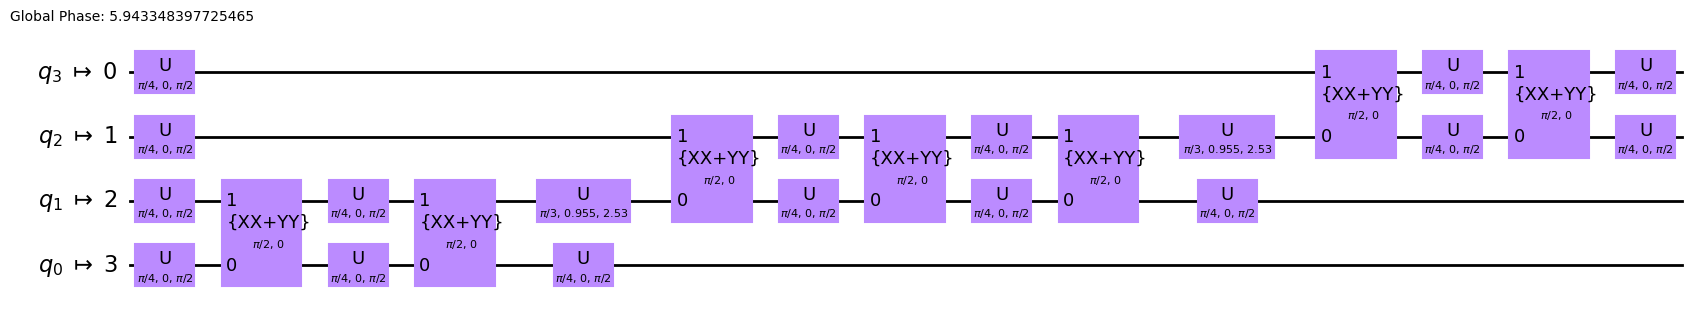

In [11]:
cx_decomp = QuantumCircuit(2)
cx_decomp.u(np.pi / 4, 0, np.pi / 2, 0)
cx_decomp.u(np.pi / 4, 0, np.pi / 2, 1)
cx_decomp.append(XXPlusYYGate(np.pi / 2, 0), [0, 1])
cx_decomp.u(np.pi / 4, 0, np.pi / 2, 0)
cx_decomp.u(np.pi / 4, 0, np.pi / 2, 1)
cx_decomp.append(XXPlusYYGate(np.pi / 2), [0, 1])
cx_decomp.u(np.pi / 4, 0, np.pi / 2, 0)
cx_decomp.u(np.pi / 4, 0, np.pi / 2, 1)
sel.add_equivalence(CXGate(), cx_decomp)

swap_decomp = QuantumCircuit(2)
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 0)
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 1)
swap_decomp.append(XXPlusYYGate(np.pi / 2, 0), [0, 1])
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 0)
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 1)
swap_decomp.append(XXPlusYYGate(np.pi / 2), [0, 1])
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 0)
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 1)
swap_decomp.append(XXPlusYYGate(np.pi / 2), [0, 1])
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 0)
swap_decomp.u(np.pi / 4, 0, np.pi / 2, 1)
sel.add_equivalence(SwapGate(), swap_decomp)

bb = transpile(
    circ, basis_gates=["u", "xx_plus_yy"], coupling_map=line_topo, optimization_level=3
)
bb.draw(output="mpl")